In [1]:
from typing import List, Union
import re

class Tokenizer:

    _WORD = re.compile(r'^\w*\b')

    _LIBRARY = [' ', '\n', '-- A comment', '.', 'abort', 'else', 'new', 'return', 'elsif', 'not', 'reverse', 'abstract', 'end', 'null', 'accept', 'entry', 'select', 'access', 'exception', 'of', 'separate', 'aliased', 'exit', 'some', 'all', 'others', 'subtype', 'and', 'for', 'out', 'synchronized', 'array', 'function', 'overriding', 'at', 'tagged', 'generic', 'package', 'task', 'begin', 'goto', 'pragma', 'terminate', 'body', 'private', 'then', 'if', 'procedure', 'type', 'case', 'in', 'protected', 'constant', 'interface', 'until', 'is', 'raise', 'use', 'declare', 'range', 'delay', 'limited', 'record', 'when', 'delta', 'loop', 'rem', 'while', 'digits', 'renames', 'with', 'do', 'mod', 'requeue', 'xor', 'abs', 'or', '=>', '(', ')', "'", '>=', '<=', '/=', '>', '<', ':=', '=', '+', '-', '*', '/', '**', '&', ',', ';', ':', '[', ']']
    _LIBRARY_REGEX = {' ': re.compile(r'^ '), '\n': re.compile(r'^\n'), '-- A comment': re.compile(r'^--.*'), '.': re.compile(r'^\.'), 'abort': re.compile(r'^\babort\b'), 'else': re.compile(r'^\belse\b'), 'new': re.compile(r'^\bnew\b'), 'return': re.compile(r'^\breturn\b'), 'elsif': re.compile(r'^\belsif\b'), 'not': re.compile(r'^\bnot\b'), 'reverse': re.compile(r'^\breverse\b'), 'abstract': re.compile(r'^\babstract\b'), 'end': re.compile(r'^\bend\b'), 'null': re.compile(r'^\bnull\b'), 'accept': re.compile(r'^\baccept\b'), 'entry': re.compile(r'^\bentry\b'), 'select': re.compile(r'^\bselect\b'), 'access': re.compile(r'^\baccess\b'), 'exception': re.compile(r'^\bexception\b'), 'of': re.compile(r'^\bof\b'), 'separate': re.compile(r'^\bseparate\b'), 'aliased': re.compile(r'^\baliased\b'), 'exit': re.compile(r'^\bexit\b'), 'some': re.compile(r'^\bsome\b'), 'all': re.compile(r'^\ball\b'), 'others': re.compile(r'^\bothers\b'), 'subtype': re.compile(r'^\bsubtype\b'), 'and': re.compile(r'^\band\b'), 'for': re.compile(r'^\bfor\b'), 'out': re.compile(r'^\bout\b'), 'synchronized': re.compile(r'^\bsynchronized\b'), 'array': re.compile(r'^\barray\b'), 'function': re.compile(r'^\bfunction\b'), 'overriding': re.compile(r'^\boverriding\b'), 'at': re.compile(r'^\bat\b'), 'tagged': re.compile(r'^\btagged\b'), 'generic': re.compile(r'^\bgeneric\b'), 'package': re.compile(r'^\bpackage\b'), 'task': re.compile(r'^\btask\b'), 'begin': re.compile(r'^\bbegin\b'), 'goto': re.compile(r'^\bgoto\b'), 'pragma': re.compile(r'^\bpragma\b'), 'terminate': re.compile(r'^\bterminate\b'), 'body': re.compile(r'^\bbody\b'), 'private': re.compile(r'^\bprivate\b'), 'then': re.compile(r'^\bthen\b'), 'if': re.compile(r'^\bif\b'), 'procedure': re.compile(r'^\bprocedure\b'), 'type': re.compile(r'^\btype\b'), 'case': re.compile(r'^\bcase\b'), 'in': re.compile(r'^\bin\b'), 'protected': re.compile(r'^\bprotected\b'), 'constant': re.compile(r'^\bconstant\b'), 'interface': re.compile(r'^\binterface\b'), 'until': re.compile(r'^\buntil\b'), 'is': re.compile(r'^\bis\b'), 'raise': re.compile(r'^\braise\b'), 'use': re.compile(r'^\buse\b'), 'declare': re.compile(r'^\bdeclare\b'), 'range': re.compile(r'^\brange\b'), 'delay': re.compile(r'^\bdelay\b'), 'limited': re.compile(r'^\blimited\b'), 'record': re.compile(r'^\brecord\b'), 'when': re.compile(r'^\bwhen\b'), 'delta': re.compile(r'^\bdelta\b'), 'loop': re.compile(r'^\bloop\b'), 'rem': re.compile(r'^\brem\b'), 'while': re.compile(r'^\bwhile\b'), 'digits': re.compile(r'^\bdigits\b'), 'renames': re.compile(r'^\brenames\b'), 'with': re.compile(r'^\bwith\b'), 'do': re.compile(r'^\bdo\b'), 'mod': re.compile(r'^\bmod\b'), 'requeue': re.compile(r'^\brequeue\b'), 'xor': re.compile(r'^\bxor\b'), 'abs': re.compile(r'^\babs\b'), 'or': re.compile(r'^\bor\b'), '=>': re.compile(r'^=>'), '(': re.compile(r'^\('), ')': re.compile(r'^\)'), "'": re.compile(r"^'"), '>=': re.compile(r'^>='), '<=': re.compile(r'^<='), '/=': re.compile(r'^/='), '>': re.compile(r'^>'), '<': re.compile(r'^<'), ':=': re.compile(r'^:='), '=': re.compile(r'^='), '+': re.compile(r'^\+'), '-': re.compile(r'^-'), '*': re.compile(r'^\*'), '/': re.compile(r'^/'), '**': re.compile(r'^\*\*'), '&': re.compile(r'^&'), ',': re.compile(r'^,'), ';': re.compile(r'^;'), ':': re.compile(r'^:'), '[': re.compile(r'^\['), ']': re.compile(r'^\]'),}

    _STRING_LIT = 'STRING_LIT'

    _LIBRARY = [_STRING_LIT] + _LIBRARY
    _LIBRARY_REGEX[_STRING_LIT] = re.compile(r'^"(""|[^"\n])*"')

    _TOKEN_TO_ID = {k: v for v, k in enumerate(_LIBRARY)}
    _ID_TO_TOKEN = {v: k for k, v in _TOKEN_TO_ID.items()}

    _PAD = len(_LIBRARY)
    _UKN1 = _PAD + 1
    _UKN2 = _UKN1 + 1
    _UKN4 = _UKN2 + 1
    _UKN8 = _UKN4 + 1
    _UKN16 = _UKN8 + 1
    _UKN32 = _UKN16 + 1
    _ID_TO_TOKEN[_PAD] = ''
    _ID_TO_TOKEN[_UKN1] = '#'
    _ID_TO_TOKEN[_UKN2] = '#' * 2
    _ID_TO_TOKEN[_UKN4] = '#' * 4
    _ID_TO_TOKEN[_UKN8] = '#' * 8
    _ID_TO_TOKEN[_UKN16] = '#' * 16
    _ID_TO_TOKEN[_UKN32] = '#' * 32
    
    
    def __init__(self) -> None:
       pass

    def _gen_uknown(self, unknown_count: int) -> List[int]:
        token_ids = []
        while unknown_count > 0:
            if unknown_count >= 32:
                unknown_count -= 32
                token_ids.append(self._UKN32)
            elif unknown_count >= 16:
                unknown_count -= 16
                token_ids.append(self._UKN16)
            elif unknown_count >= 8:
                unknown_count -= 8
                token_ids.append(self._UKN8)
            elif unknown_count >= 4:
                unknown_count -= 4
                token_ids.append(self._UKN4)
            elif unknown_count >= 2:
                unknown_count -= 2
                token_ids.append(self._UKN2)
            else:
                unknown_count -= 1
                token_ids.append(self._UKN1)
        return token_ids

    def encode(self, text: str) -> List[int]:
        token_ids = []
        unknown_count = 0
        while text:
            for token in self._LIBRARY:
                if match := self._LIBRARY_REGEX[token].match(text):
                    token_ids.extend(self._gen_uknown(unknown_count))
                    unknown_count = 0
                    if token == self._STRING_LIT:
                        match_length = len(match.group())
                        token_ids.extend([self._TOKEN_TO_ID[token]] * match_length)
                        text = text[match_length:]
                    else:
                        text = self._LIBRARY_REGEX[token].sub('', text, count=1)
                        token_ids.append(self._TOKEN_TO_ID[token])
                    break
            else:
                word_length = 1
                if match := self._WORD.match(text):
                    word_length = len(match.group())
                unknown_count += word_length
                text = text[word_length:]
        token_ids.extend(self._gen_uknown(unknown_count))
        return token_ids
    
    def _decode_string_literals(self, token_ids: List[int]) -> List[Union[int, str]]:
        result = []
        str_char_count = 0
        for token_id in token_ids:
            if token_id == self._TOKEN_TO_ID[self._STRING_LIT]:
                str_char_count += 1
            else:
                if str_char_count > 0:
                    result.append('"' + self._ID_TO_TOKEN[self._UKN1] * (str_char_count - 2) + '"')
                    str_char_count = 0
                result.append(token_id)
        else:
            if str_char_count > 0:
                    result.append('"' + self._ID_TO_TOKEN[self._UKN1] * (str_char_count - 2) + '"')
                    str_char_count = 0
        return result


    def decode(self, token_ids: List[int]) -> str:
        partial_decode = self._decode_string_literals(token_ids)
        text_parts = [self._ID_TO_TOKEN[x] if isinstance(x, int) else x for x in partial_decode]
        return ''.join(text_parts)
    
    def resize(self, token_ids: List[int], max_length: int) -> List[int]:
        # If the token_ids are longer than max_length, truncate the start
        # If the token_ids are shorter than max_length, pad the start with _PAD
        if len(token_ids) > max_length:
            return token_ids[-max_length:]
        else:
            return [self._PAD] * (max_length - len(token_ids)) + token_ids
    
    @property
    def n_vocab(self) -> int:
        return len(self._ID_TO_TOKEN) + 1


In [2]:
import random
import numpy as np
import tensorflow as tf

# Set a fixed seed for reproducibility, for the random module, numpy, and tensorflow
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

2023-06-20 22:26:57.228330: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 22:26:57.248229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import os
import subprocess

DATA_DIR = "data"

git_repos = [
    "https://github.com/AdaCore/Ada_Drivers_Library.git",
    "https://github.com/AdaCore/gnatstudio.git",
    "https://github.com/AdaCore/spark2014.git",
    "https://github.com/AdaCore/ada_language_server.git",
    "https://github.com/AdaCore/gnat-llvm.git",
    "https://github.com/AdaCore/libadalang.git",
    "https://github.com/AdaCore/aws.git",
    "https://github.com/AdaCore/RecordFlux.git",
]

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

for repo in git_repos:
    subprocess.run(["git", "clone", "--depth", "1", repo], cwd=DATA_DIR)


fatal: destination path 'Ada_Drivers_Library' already exists and is not an empty directory.
fatal: destination path 'gnatstudio' already exists and is not an empty directory.
fatal: destination path 'spark2014' already exists and is not an empty directory.
fatal: destination path 'ada_language_server' already exists and is not an empty directory.
fatal: destination path 'gnat-llvm' already exists and is not an empty directory.
fatal: destination path 'libadalang' already exists and is not an empty directory.
fatal: destination path 'aws' already exists and is not an empty directory.
fatal: destination path 'RecordFlux' already exists and is not an empty directory.


In [4]:
import hashlib
import math

from typing import List


def file_hash(file_path: str):
    # Calculate the hash of a file
    with open(file_path, "rb") as f:
        file_hash = hashlib.sha256()
        while chunk := f.read(8192):
            file_hash.update(chunk)
    return file_hash.hexdigest()

def is_file_mostly_space_indented(file_path: str):
    # Returns True if the file is mostly space indented
    # Returns False if the file is mostly tab indented
    # Defaults to False if the file is empty
    space_indent_count = 0
    tab_indent_count = 0
    with open(file_path, "r", encoding="utf-8") as f:
        file_contents = f.readlines()
        for line in file_contents:
            whitespace_count = len(line) - len(line.lstrip())
            whitespaces = line[:whitespace_count]
            space_indent_count += whitespaces.count(" ")
            tab_indent_count += whitespaces.count("\t")

    # In ada, the convention is to use 3 spaces for indentation
    space_indent_count = math.ceil(space_indent_count / 3)
    return space_indent_count > tab_indent_count or tab_indent_count == 0


def get_files_to_process(data_dir: str, skip_non_utf8_files: bool = True):
    # returns a list of unique ada files in the data ada_code_bases directory
    file_types_to_keep = {".ads", ".adb", ".gpr"}
    hashes = set()
    files_to_process = []

    for root, _, files in os.walk(data_dir):
        for file in files:
            file_type = os.path.splitext(file)[1]
            if file_type in file_types_to_keep:
                file_path = os.path.join(root, file)
                hash = file_hash(file_path)
                if hash not in hashes:
                    hashes.add(hash)
                    # If the file is not UTF-8, skip it
                    if skip_non_utf8_files:
                        try:
                            with open(file_path, "r", encoding="utf-8") as f:
                                f.read()
                            # We only want to process files that are mostly space indented
                            if not is_file_mostly_space_indented(file_path):
                                continue
                            files_to_process.append(file_path)
                        except UnicodeDecodeError:
                            continue
                    else:
                        files_to_process.append(file_path)
    return files_to_process


In [5]:
from typing import Tuple

def count_leading_spaces(line: str) -> int:
    # Returns the number of leading spaces in line
    return len(line) - len(line.lstrip())

def filter_empty_lines(lines: List[str]) -> List[str]:
    # Returns a list of all lines from lines that are not empty
    return [line for line in lines if line.strip() != ""]

unindent = re.compile(r'^\s*(begin|end);')
def is_unexpected_unindent(line: str) -> bool:
    return unindent.match(line) is not None


def label_data(files_to_process: List[str], lines_to_group: int) -> List[Tuple[str, int]]:
    # For every file in files_to_process, read all of the lines from the file, and assign a label to each line, which is the number of spaces at the beginning of the next line
    labelled_data = []
    for file in files_to_process:
        with open(file, "r", encoding="utf-8") as f:
            lines = filter_empty_lines(f.readlines())
            lines.append("")
            for i in range(len(lines) - lines_to_group):
                data = ''.join(lines[i : i + lines_to_group])
                next_line = lines[i + lines_to_group]
                if is_unexpected_unindent(next_line):
                    continue
                label = count_leading_spaces(next_line)
                labelled_data.append((data, label))
    return labelled_data


In [6]:
# Note that since 0 is an identation too, the actual max is 119
INDENTATION_PREDICTION_CATEGORIES = 120


In [7]:
files_to_process = get_files_to_process(DATA_DIR)
print(f"Number of files to process: {len(files_to_process)}")


labelled_data = label_data(files_to_process, 3)
labelled_data = [(data, label) for data, label in labelled_data if label < INDENTATION_PREDICTION_CATEGORIES]

enc = Tokenizer()

labelled_data = [(enc.encode(data), label) for data, label in labelled_data]


Number of files to process: 18633


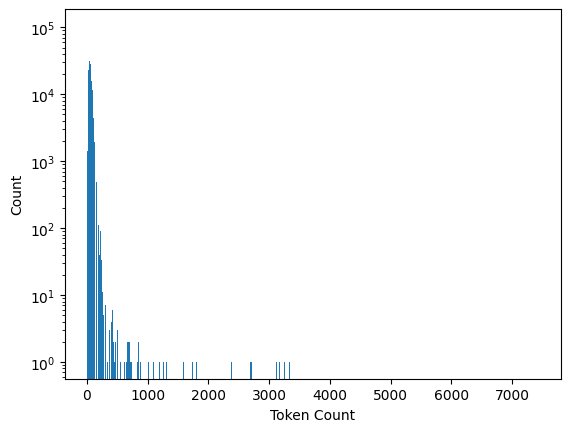

In [8]:
data_length_count = {}

for x in labelled_data:
    data_length_count[len(x[0])] = data_length_count.get(len(x[0]), 0) + 1

# Plot data_length_count. Make the y axis logarithmic
import matplotlib.pyplot as plt
plt.bar(data_length_count.keys(), data_length_count.values())
plt.yscale("log")
plt.xlabel("Token Count")
plt.ylabel("Count")
plt.show()

In [9]:
print(labelled_data[0])
labelled_data = [(enc.resize(data, 250), tf.keras.utils.to_categorical(label, num_classes=INDENTATION_PREDICTION_CATEGORIES)) for data, label in labelled_data]

([37, 2, 38, 1, 102, 101, 4, 102, 101, 1, 56, 2, 13, 1, 102, 101, 4, 102, 101, 96, 2], 0)


In [10]:
from sklearn.model_selection import train_test_split

# Split labelled_data into two lists, X and y
X = [data for data, _ in labelled_data]
y = [label for _, label in labelled_data]

# Convert X to a numpy array
X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

del X
del y

In [11]:
def decode(x_value):
    return enc.decode(x_value)

In [18]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(enc.n_vocab, 64, input_length=250))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(INDENTATION_PREDICTION_CATEGORIES, input_shape=(250,), activation="softmax"))
    adam = tf.keras.optimizers.Adam(learning_rate=0.0003)
    model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

model = create_model()
model.summary()


2023-06-20 22:36:38.964830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 22:36:38.965476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 22:36:38.965897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 64)           6912      
                                                                 
 bidirectional_7 (Bidirectio  (None, 250, 1024)        2363392   
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 250, 512)         2623488   
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                      

2023-06-20 22:36:39.174147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 22:36:39.174715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 22:36:39.175114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [16]:
checkpoint_path = "checkpoints/indentation_prediction_v1_100_epoch.ckpt"
callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=0)

In [20]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/100
    7/56076 [..............................] - ETA: 13:29:32 - loss: 2.7220 - accuracy: 0.3170

: 

: 

In [13]:
# model = create_model()
# model.load_weights(checkpoint_path)
# loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# loss, accuracy = model.evaluate(X_val, y_val, verbose=1)

9870/9870 [==============================] - 11s 1ms/step - loss: 0.7003 - accuracy: 0.8093
